# Wind energy

### First insight

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "../../../datasets/_classified/kaggle/"

In [43]:
test = pd.read_csv(path + "EMHIRES_WIND_COUNTRY_June2019.csv")
test.head(2)

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
0,"0,3685","0,06084","0,252","0,23762","0,248","0,04731","0,14","0,12201","0,14169","0,24466","0,0331","0,49272","0,68749","0,31303","0,17573","0,20264","0,04151","0,3685","0,09189","0,834","0,33069","0,45416","0,02208","0,31143","0,284","0,284","0,40628","0,26292","0,12015","0,22683","0,05124","0,2505","0,17086","0,6772","0,05715","0,268793922"
1,"0,3235","0,05282","0,23841","0,23842","0,227","0,08463","0,148","0,12907","0,13404","0,21717","0,041","0,45874","0,66091","0,33866","0,16771","0,1613","0,03706","0,3235","0,06985","0,847","0,30066","0,44609","0,02166","0,27896","0,285","0,285","0,39115","0,26376","0,11985","0,25821","0,04665","0,24625","0,15909","0,66776","0,05218","0,270761"


In [44]:
test.columns

Index(['AL', 'AT', 'BE', 'BG', 'BA', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL',
       'ES', 'FI', 'FR', 'HR', 'HU', 'XK', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV',
       'ME', 'MK', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'UK'],
      dtype='object')

In [45]:
for c in test.columns:
    test[c] = test[c].str.replace(',', '.').astype('float64')

In [47]:
test = add_time(test)

In [48]:
test.head()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK,time,hour,month,week
0,0.3685,0.06084,0.25200,0.23762,0.2480,0.04731,0.140,0.12201,0.14169,0.24466,0.03310,0.49272,0.68749,0.31303,0.17573,0.20264,0.04151,0.3685,0.09189,0.834,0.33069,0.45416,0.02208,0.31143,0.284,0.284,0.40628,0.26292,0.12015,0.22683,0.05124,0.25050,0.17086,0.67720,0.05715,0.268794,1986-01-01 00:00:00,0,1,1
1,0.3235,0.05282,0.23841,0.23842,0.2270,0.08463,0.148,0.12907,0.13404,0.21717,0.04100,0.45874,0.66091,0.33866,0.16771,0.16130,0.03706,0.3235,0.06985,0.847,0.30066,0.44609,0.02166,0.27896,0.285,0.285,0.39115,0.26376,0.11985,0.25821,0.04665,0.24625,0.15909,0.66776,0.05218,0.270761,1986-01-01 01:00:00,1,1,1
2,0.2735,0.04276,0.22110,0.23033,0.2000,0.11741,0.157,0.12151,0.13172,0.19431,0.05674,0.42724,0.63251,0.36834,0.15877,0.13140,0.03250,0.2735,0.07464,0.843,0.27052,0.45043,0.01921,0.25944,0.262,0.262,0.36163,0.26695,0.12113,0.27921,0.04543,0.23250,0.15296,0.65904,0.03905,0.265209,1986-01-01 02:00:00,2,1,1
3,0.2600,0.02914,0.21491,0.24158,0.1875,0.13830,0.171,0.09998,0.13686,0.18278,0.07081,0.42569,0.61890,0.39019,0.14818,0.10758,0.02810,0.2600,0.09003,0.829,0.24614,0.43283,0.01655,0.23939,0.262,0.262,0.35170,0.27101,0.11858,0.33106,0.04455,0.20525,0.15328,0.58460,0.02130,0.257709,1986-01-01 03:00:00,3,1,1
4,0.2530,0.01780,0.20304,0.26168,0.1690,0.13895,0.179,0.07800,0.14124,0.17356,0.08243,0.44443,0.62397,0.40209,0.13631,0.09077,0.02681,0.2530,0.13664,0.798,0.21655,0.40777,0.01331,0.22052,0.243,0.243,0.36168,0.28097,0.11101,0.38668,0.05438,0.20075,0.15013,0.46732,0.01029,0.247726,1986-01-01 04:00:00,4,1,1


Text(0.5, 1.0, 'Efficiency of wind stations per country during the last day (31th december 2015)')

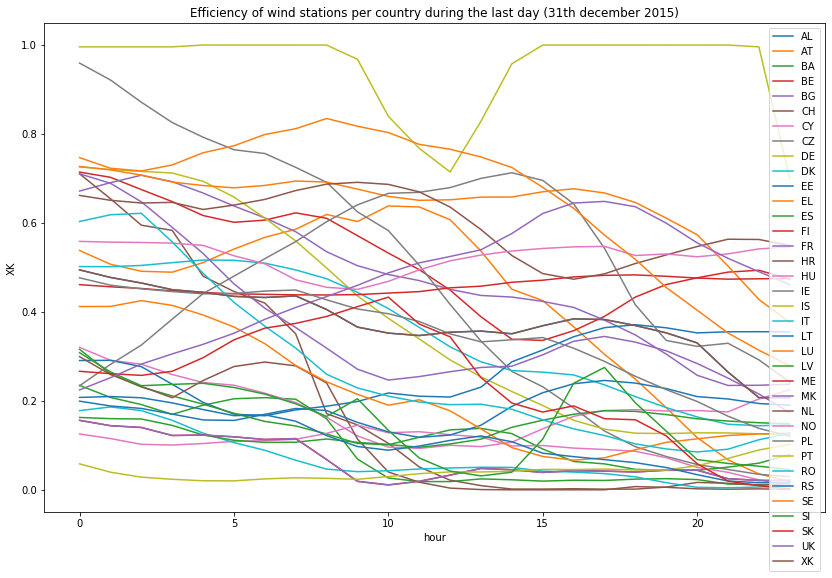

In [49]:
temp_df = test[test.columns.difference(['time', 'month', 'week', 'Time_step', 'Date', 'Year', 'Month', 'Day', 'Hour'])][-24:]
plt.figure(figsize=(14, 9))
for c in temp_df.columns:
    if c != 'hour':
        sns.lineplot(x="hour", y=c, data=temp_df, label=c)
        #plt.legend(c)
plt.title("Efficiency of wind stations per country during the last day (31th december 2015)")

Text(0.5, 1.0, 'Efficiency of wind stations per country during the day')

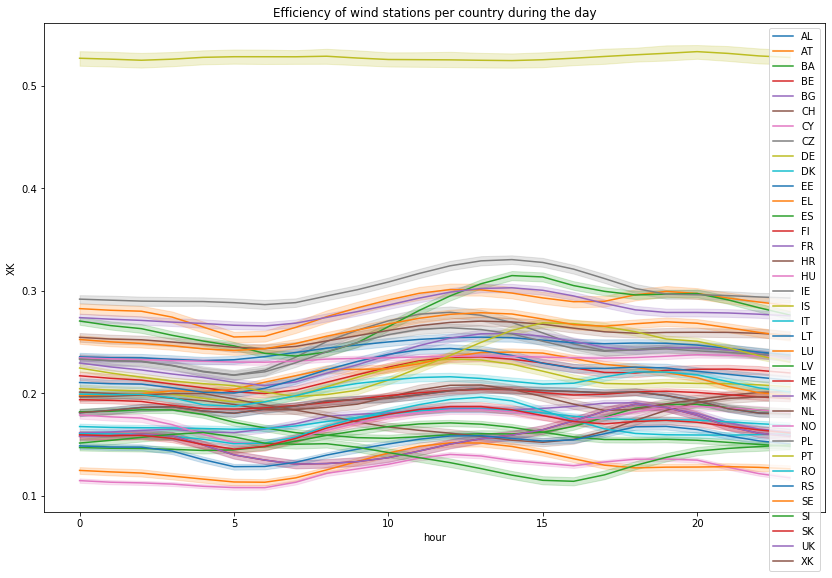

In [50]:
temp_df = test[test.columns.difference(['time', 'month', 'week'])]
plt.figure(figsize=(14, 9))
for c in temp_df.columns:
    if c != 'hour':
        sns.lineplot(x="hour", y=c, data=temp_df, label=c)
        #plt.legend(c)
plt.title("Efficiency of wind stations per country during the day")